
## FINANCIAL ECONOMETRICS
MODULE 2 | LESSON 1

---

# **OLS REGRESSION ASSUMPTIONS AND WEIGHTED LEAST SQUARE REGRESSION**



|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | OLS regression analysis, Linear Algebra  |
|**Keywords** | Homoscedasticity, Heteroscedasticity, Independent and identically distributed, Weighted least square regression, Breusch-Pagan Test |


---

*In the last module, we discussed the applications of linear regression models and some of their assumptions. We learned how to handle multicollinearity when independent variables are highly correlated. We also went through methods to transform variables when they don’t meet the assumptions in a regression model. In this module, we will dive deeper into and offer variations of regression analysis. We will first review main assumptions for an ordinary least square model. Then, we will focus on the heteroscedasticity of a regression model and introduce the weighted least square model as a way to handle the issue.*

*We are also introducing a new working example in this module. We will analyze some factors that might impact the foreign exchange markets. We will use different regression methods we learn in each lesson to conduct the analysis.*



In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

plt.rcParams["figure.figsize"] = (14, 8)  # Figure size and width

In [ ]:
# Import data
data_set = pd.read_csv("M2. module_2_data.csv")

## **1. Assumptions of Ordinary Least Square Regression**

Ordinary least square (OLS) regression models are based on the following assumptions.

### **1.1 Linear Relationship**

The OLS regression model assumes that the dependent variable has a linear relationship with independent variables. If $Y$ is the dependent variable and $X_1$, $X_2$ and $X_3$ are independent variables and $e$ is the error term, we can write an OLS regression model as follows:

$$ Y = \beta_0 + \beta_1  X_1 + \beta_2 X_2 + \beta_3 X_3 + e $$

From Module 1, we learned how to use variable transformation methods to ensure this relationship exists.

### **1.2 No Multicollinearity**

This assumption states that independent variables should be linearly independent to each other. In reality, many independent variables are correlated to each other. Some might have low correlations and some might have high correlations. We learned from the last module that if independent variables are highly correlated, we can check their correlations or VIFs and drop variables. We can also apply principal component analysis or factor analysis to address the issue.

### **1.3 Independent Error Terms**

This assumption for OLS means that the error terms from each observation will be independent of each other.

Assume we have these two observations from the dataset $ ( y_1, X_{11}, X_{21}, X_{31} )$ and $ ( y_{2}, X_{12}, X_{22}, X_{32} ) $. We can plug these two observations into an OLS regression model system.

$$ y_{1} = \beta_{0} + \beta_{1}  X_{11} + \beta_{2}  X_{21} + \beta_{3} X_{31} + e_{1} $$

$$ y_{2} = \beta_{0} + \beta_{1} X_{12} + \beta_{2} X_{22} + \beta_{3} X_{32} + e_{2} $$

This assumption states that $e_{1}$ and $e_{2}$ are independent of each other. If they are not independent, we call them **autocorrelated**.

### **1.4 Error Terms are Normally Distributed**

From our example, this means that $e_{1}$ and $e_{2}$ have to be normally distributed.

### **1.5 Expected Values of Error Terms are 0**

From our example, the expected values of $e_{1}$ and $e_{2}$ have to be $0$.

### **1.6 Error Terms Have the Same Variance (Homoscedasticity)**

When the variances of error terms are constant, we call the error terms **homoscedastic.** If the error terms are not constant, we call them **heteroscedastic.**

With all the above assumptions about error terms, we usually call the error terms **IID: independent and identically distributed**. With the assumptions of 1.4, 1.5, and 1.6, we can summarize the error terms as follows:

$$
e \sim N (0, \sigma^{2}) 
$$

Now we can write the multiple regression mean function as follows:

$$ 
E (Y|X) = \beta X 
$$

And variances of the errors are constant.

$$ 
\mathrm{Var}(Y|X)= \mathrm{Var}(e|X) = \delta^{2} 
$$

Because the variance function is for multiple regression, $$\mathrm{Var}(e)$$ is actually a covariance matrix.

$$ 
\mathrm{Var}(e) = \begin{pmatrix}
  \delta ^{2} & 0 & 0 & \cdots & 0 \\ 
  0 & \delta ^{2} & 0 & \cdots & 0 \\ 
  0 & 0 & \delta ^{2} & \cdots & 0 \\ 
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & 0 & \cdots & \delta ^{2} \\ 
\end{pmatrix} 
$$

We can see the values on the diagonal of the matrix are the constant variance, and the values of the diagonal of the matrix are $0$. Because the assumption error terms are independent, the covariances of different error terms are $0$.

Now we want to see what happens when any of the above assumptions do not exist. In the last module, we talked about how to handle the situations when the linear relationship and low multicollinearity assumptions are violated. In the following section, we will turn our focus on the assumption of homoscedasticity. We want to see how to detect when the homoscedasticity assumption does not hold up and what method we can use to run a regression analysis when heteroscedasticity exists. Particularly, we will introduce a weighted least square regression to handle heteroscedasticity. 

## **2. Weighted Least Square Regression**

### **2.1 How to Detect Heteroscedasticity**

As we mentioned in the last section, heteroscedasticity occurs when error terms in a regression analysis are not constant among observations. After running an OLS regression model, we can draw a scatter plot between predicted values vs. residuals to check for homoscedasticity (or heteroscedasticity). **Residuals** are the differences between measured values of the dependent variables and predicted values of dependent variables from the OLS regression model. 

**Figure 1: Homoscedasticity vs. Heteroscedasticity**


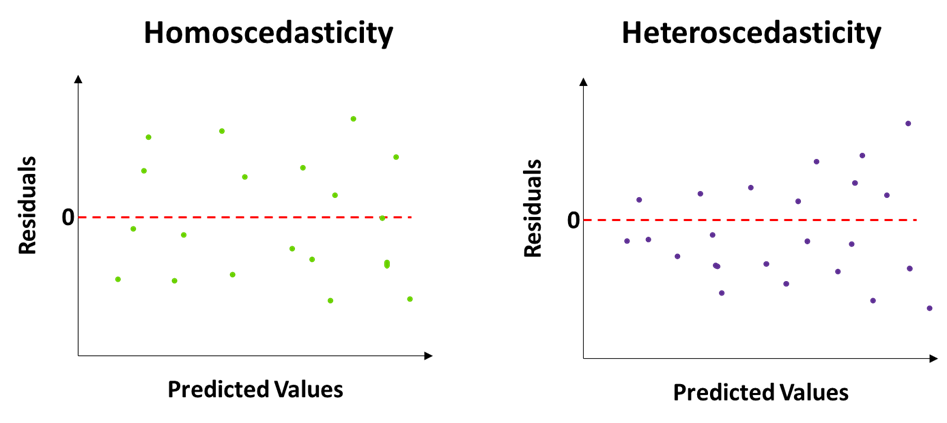



From Figure 1, we can see the residuals scatter around the $0$ line evenly in the homoscedasticity graph on the left. It means the variance for residuals is very constant along the $0$ line. However, in the heteroscedasticity graph on the right, the residuals are more concentrated when the predicted values are small, and the residuals are more spread out when the predicted values are large. The data shows a cone or a megaphone pattern in the graph. It implies that as the predicted values increase, the variances increase too. The variances are not constant. 

Graphs are visual aids. Sometimes, the graphs can make it difficult to spot the issue of heteroscedasticity. There are several formal methods to detect heteroscedasticity. The **Breusch-Pagan (BP) test** is a formal statistical test to detect the issue.The idea of the BP test is that it assumes that the variance and independent variables have a linear relationship. The test then runs a regression of the squared residuals from the original regression on the independent variables. Then, a BP test checks the following hypothesis:

$$ H_{0}: \text{Homoscedasticity exists} $$

$$ H_{1}: \text{Heteroscedasticity exists} $$

This is a *Chi-square* test. If the $p$-value is less than the significant level of 0.05, we reject the null hypothesis. The residuals are not constant, so there is a heteroscedasticity issue.

There are other tests to check for heteroscedasticity. One of them is the **White test,** which tests the same hypothesis as the BP test. However, the White test does not assume a linear relationship between the variance and independent variables.

### **2.2 Basics of Weighted Least Square Regression**

When the error term variances are not constant, the covariance matrix for $n$ observations will be like the following:

$$ 
\mathrm{Var}(e) = \begin{pmatrix}
  \delta_{1}^{2} & 0 & 0 & \cdots & 0 \\ 
  0 & \delta_{2}^{2} & 0 & \cdots & 0 \\ 
  0 & 0 & \delta_{3} ^{2} & \cdots & 0 \\ 
  \vdots & \vdots & \vdots & \ddots & \vdots \\ 
  0 & 0 & 0 & \cdots & \delta_{n} ^{2} \\ 
\end{pmatrix} 
$$

 where  $\delta_{1}^{2} \neq \delta_{2}^{2} \neq \delta_{3}^{2} \neq \cdots \neq \delta_{n}^{2}$

Let’s assume the variance of the error term of observation $i$ is as follows:

$$ 
\mathrm{Var}(e_{i}) = \delta_{i}^{2} = \frac{\sigma ^{2}}{w_{i}} 
$$

Where $w_{1}, \cdots, w_{n}$ are known positive numbers

For weighted least square regression, we need to solve for coefficients by minimizing the following sum of weighted squared residuals.

$$ 
RSS(\beta_{0}, \beta_{1}) = \sum_{i=1}^{n} w_{i} (Y_{i} - \beta_{0} - \beta_{1}  X_{i})^{2} 
$$

The above function is called an **objective function**. An **objective function** is a function we would like to maximize or minimize. Please see section 4 in this lesson for more information on how to derive the coefficients of weighted least square regression.

We can see the weight $w_{i}$ is inversely proportional to the variance of each observation. It means for an observation that is highly variable, it will be given a smaller weight for its weighted squared residual. Hence, this observation will have less importance in the minimization process. For an observation that has small variability, its weight will be larger. Its weighted squared residual will be larger, and it will be more important in the minimization process.

**Figure 2: Impact of Data Weighting on Regression Lines**


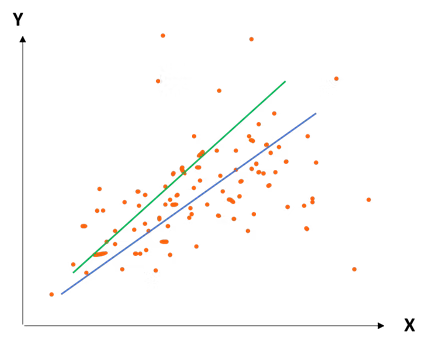



From Figure 2, $Y$ is the dependent variable and $X$ is the independent variable of a regression. Figure 2 shows the scatterplot of the two variables. From the graph, we can see the data is not homoscedastic because there is more variation of $Y$ when $X$ increases. If we do not apply weights to the data and run an OLS regression model, then the regression line will try to treat all data points equally. The result line will be like the green line. The green line is higher and steeper towards the data point on the top of the graph because OLS treats every point equally. However, if we apply weights to all the data points, we will reduce the impact of those points that are further away from where most of the points cluster together. The weighted least square (WLS) regression line will be like the blue line. WLS focuses more on the data points that are close to each other and gives lower weight to points that are farther away. Hence, WLS is also a good method to handle **outliers**. When there is an outlier in the dataset, by the method of WLS, it will give less weight so this outlier will have less impact on the result of the WLS regression model.

One thing to notice is that if the weight is $1$, then we are basically running an OLS regression model. In the field of regression analysis, OLS is actually a special case of WLS because OLS has weights equal to $1$. 

### **2.3 How Do We Estimate Weights?**

We don’t always know the numbers of the weight. What should we do when the weights are unknown? In the last section, we learned that the weight is proportionally inverse to the variance of each error term. 

$$ w_{i}= \frac{\sigma^{2}}{\sigma_{i}^{2}} $$

Since $w_{i}$ is the weight and $\sigma^{2}$ is an unknown constant and we only care about relationship among weights, not the scale, we can assume $\sigma^{2}$ to be $1$. As such, we can try to estimate the following weight function.

$$ w_{i}= \frac{1}{\sigma_{i}^{2}} $$

However, we still don’t know the variance for each error term of the observation ($\sigma_{i}^{2}$). We will use the residuals from OLS to estimate the error terms.

Here are the steps to run a WLS regression model:

**Step 1:** Run an OLS regression model.

**Step 2:** Draw a scatter plot with fitted values from OLS on the $X$ axis and residuals from OLS on the $Y$ axis.

**Step 3:** Inspect the scatter plot to see if there is a cone or megaphone pattern in the plot to indicate heteroscedasticity. You can also use the **Breusch-Pagan test** to check for heteroscedasticity, as discussed in the last section.

**Step 4:** If you determine that there is heteroscedasticity in the OLS model, you will have to estimate the weights. We know from the last section that the weight for each observation is the inverse of the variance. We can use squared residuals from OLS to estimate the variances. In order to estimate squared residuals, we will run an OLS regression model with absolute values of the residuals as the dependent variable and the fitted values as an independent variable as follows:

$$ \text{residuals from OLS} | = 1 + \gamma \cdot \text{fitted values from OLS} + e $$

We will use the fitted value from the above OLS regression as the proxy for standard deviation. Variance is the squared standard deviation. We then plug the estimated standard deviation into the following equation to get the weight variable.

$$ \text{weight} =\frac{1}{\text{standard deviation}^{2}} $$

**Step 5:** Once we get the weight variable, we can plug this weight variable into any statistical software to run a weighted least square regression model.

## **3. Foreign Exchange Market Analysis Using Weighted Least Square Regression**

Now, let’s look at an example to learn how to run weighted least square regression.

We will use WLS to understand how the U.S. 10-year treasury bond yield would influence the U.S. Dollar Index. Both variables are converted to daily returns for analysis. We use the daily data from 2016. Here are their variable names.

- *DXY*: US Dollar Index daily return 
- *X10Y_TBY*: 10-Year Treasury Bond Yield daily return

First, let’s draw a scatter plot to see if the two variables have any relationship.

**Figure 3: U.S. Dollar Index Daily Return and 10-Year Treasury Bond Yield Daily Return Scatter Plot**


In [ ]:
# Create scatter plot
scatt = data_set.plot.scatter(x="DXY", y="X10Y_TBY")
scatt.set(xlabel="DXY", ylabel="X10Y_TBY")
plt.show()

From Figure 3, we can see two interesting patterns. First, they seem to have a positive relationship. We can see as *DXY* increases, *X10Y_TBY* increases too. Secondly, as *DXY* increases, the data points spread out more. It forms a cone or megaphone shape. It indicates that there might be a heteroscedasticity issue.

Now, let’s run an OLS regression with *DXY* as the dependent variable and *X10Y_TBY* as the independent variable.

**Figure 4: OLS Regression Result**


In [ ]:
# OLS model
model_1 = smf.ols("DXY ~ X10Y_TBY", data=data_set).fit()
model_1.summary()

In [ ]:
# Parameters with high precision
print(model_1.summary2().tables[1])

From Figure 4, we can see that *DXY* and *X10Y_TBY* have a positive coefficient, which is consistent with what we saw in the scatter plot. The coefficient is also significant. The $R^2$ is not very good for this simple regression model. Now, let’s check the scatter plot for residuals and fitted values of this OLS model to see if there is a heteroscedasticity issue.

**Figure 5: Scatter Plot for OLS Fitted Values and OLS Residuals**


In [ ]:
# Scatter Plot for OLS Fitted Values and OLS Residuals

# Fitted values and residuals
model_fitted_y = model_1.fittedvalues
model_resid_y = model_1.resid

# Plot
plt.scatter(x=model_fitted_y, y=model_resid_y)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()

Figure 5 shows that there is more variation in residuals when fitted values are negative than when fitted values are positive, especially when fitted values are below -0.002. The scatter plot indicates there might be a heteroscedasticity issue. Let’s run a Breusch-Pagan test to double-check the hypothesis.

**Figure 6: Breusch-Pagan Test Result**


In [ ]:
# Breusch-Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
pd.DataFrame(test, index=name, columns=[""])

The test result from Figure 6 also confirms the existence of heteroscedasticity because the $p$-value is less than 0.05. Based on the above information, we will run the model with weighted least square, with the weight generated from the formula from the last section.

**Figure 7: WLS Result**


In [ ]:
# WLS regression result

# Add Absolute residuals and fitted values to dataset columns
data_set["abs_residuals"] = np.abs(model_1.resid)
data_set["fitted_values"] = model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp = smf.ols("abs_residuals ~ fitted_values", data=data_set).fit()

# Compute weights and add it to the data_set column
weights = model_temp.fittedvalues
weights = weights ** -2
data_set["weights"] = weights

# Fit WLS model
Y = data_set["DXY"].tolist()
X = data_set["X10Y_TBY"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, data_set["weights"]).fit()
model_WLS.summary()

From Figure 7, we can see *X10Y_TBY* still has a positive coefficient and the coefficient is still significant. The $R^2$ also improves a lot from 0.03 to 0.10. Now, let’s look at the residuals and fitted values from WLS to see if we can correct the heteroscedasticity issue. Before doing that, we need to convert residuals to standardized residuals because the variables have been weighted. If we were to use old residuals, it would still be heteroscedastic. 

**Figure 8: WLS Standardized Residuals and Fitted Values Scatter Plot**


In [ ]:
# WLS fitted values and standardized residuals
fitted_valuesWLS = model_WLS.fittedvalues
model_residWLS = model_WLS.resid
std_model_residWLS = model_residWLS / model_residWLS.std(ddof=1)

# Plot WLS fitted v. vs standardized res. scatterplot
plt.scatter(fitted_valuesWLS, std_model_residWLS)
plt.xlabel("WLS fitted Values")
plt.ylabel("WLS Standardized Residuals")
plt.show()

## **4. Derivation of Coefficients for Weighted Least Square Regression**

We first use a single regression model to derive coefficients for weighted least square regression.

Assume we have the following simple regression model for n observations:

$$ 
Y_{i} = \beta_{0} + \beta_{1} X_{i} + e_{i}, \quad  i = 1, …, n  
$$

Where $ e \sim N( 0, \frac{\sigma ^{2}}{w_{i}} ) $ and $w_1,…,w_n $ are known positive numbers

For weighted least square regression, we are looking for $\beta_{0}$ and $\beta_{1}$ that will minimize the sum of weighted squared residuals. Here is the objective function:

$$ 
RSS (\beta_{0}, \beta_{1})= \sum_{i=1}^{n}w_{i} ( Y_{i} - \beta_{0} - \beta_{1} X_{i} )^{2} 
$$

We take partial derivatives of the objective function with respect to $\beta_{0}$ and $\beta_{1}$ to get the WLS estimates of $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$

$$ 
\begin{align}
  \hat{\beta_{0}}  &= \overline{Y_{w}} - \hat{\beta_{1}} \overline{X_{w}} \\
  \hat{\beta_{1}}  &= \frac{\sum_{i=1}^{n}  w_{i}  (X_{i} - \overline{X_{w}}) (Y_{i} -\overline{Y_{w}})}{\sum_{i=1}^{n}  w_{i}  (X_{i} - \overline{X_{w}})^{2}} 
\end{align} 
$$

Where $\overline{X_{w}}$ and $\overline{Y_{w}}$ are weighted averages of $X$ and $Y$ with weights $w$.

$$ 
\overline{X_{w}} = \frac{\sum_{i=1}^{n} X_{i} w_{i}}{\sum_{i=1}^{n} w_{i}}  \quad \text{  and  } \quad  \overline{Y_{w}} = \frac{\sum_{i=1}^{n} Y_{i} w_{i}}{\sum_{i=1}^{n} w_{i}} 
$$

We can apply the same process above to solve for coefficients for weighted least square regression with multiple independent variables. This is a general form of derivation because we don’t restrict the number of independent variables. Since we have multiple independent variables now, we will use the matrix form to solve the minimization problem.

For multiple weighted least regression, we have the model:

$$ 
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta } + \mathbf{e} 
$$

$$ 
\mathrm{Var}(e) = \sigma^{2} \mathbf{W}^{-1} 
$$

We minimize the following sum of weighted squared residuals in matrix form for multiple weighted least square regression models. Here is the objective function:

$$ 
RSS(\boldsymbol{\beta }) = \sum_{i=1}^{n} w_{i} (Y_{i} - X_{i}^{t} \boldsymbol{\beta})^{2} = (\mathbf{Y} - \mathbf{X} \boldsymbol{\beta})^{t} \mathbf{W} (\mathbf{Y} - \mathbf{X} \boldsymbol{\beta}) 
$$

We take the partial derivatives of the above objective function with respect to $\boldsymbol{\beta}$ and set the equations to $0$ to solve for $\boldsymbol{\beta}$.

$$ 
\sum_{i=1}^{n} w_{i} e_{i} X_{i}^{t}= 0 
$$

The general form of WLS estimator is given by

$$ 
\hat{\boldsymbol{\beta}} = (\mathbf{X}^{t} \mathbf{W} \mathbf{X})^{-1}  (\mathbf{X}^{t} \mathbf{W \textbf{Y}}) 
$$



## **5. Conclusion**

In this lesson, we first reviewed the key assumptions for an ordinary least square regression model. We then relaxed the assumption of homoscedasticity. If the data shows heteroscedasticity, which is a violation of homoscedasticity, we will use a weighted least square regression model to handle the issue.

We pointed out that OLS is a special case for WLS when the weight is $1$, which means the data is unweighted. We then introduced the basics of WLS and the steps to run WLS. We finished the lesson with one example from the foreign exchange market. In the next lesson, we will introduce another regression method when the assumptions of OLS do not hold up well in the dataset.



---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
